# Titanic Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
!dir

 Volume in drive D is DATA
 Volume Serial Number is C4AD-9E5D

 Directory of D:\WORK\MOONLIGHT_PROJECT\YOU TUBE\Titanic Solution

15/06/2022  15:00    <DIR>          .
24/04/2022  22:50    <DIR>          ..
15/06/2022  13:51    <DIR>          .ipynb_checkpoints
23/04/2022  14:18                 0 .txt
13/06/2022  17:37    <DIR>          Belajar Data Science #1
01/06/2022  20:12    <DIR>          Belajar Data Science #2
13/06/2022  19:12    <DIR>          Belajar Data Science #3
15/06/2022  14:13    <DIR>          Belajar Data Science #4
14/06/2022  19:53           514.704 Belajar Data Science [Project] - Titanic.ipynb
21/05/2022  10:44    <DIR>          data
08/11/2019  16:59         1.225.590 Data Science_ Hype or Hero.pdf
24/05/2022  10:47    <DIR>          github
24/04/2022  22:12        20.859.778 rekaman fix.mp3
21/05/2022  15:18            12.388 research.docx
16/05/2022  22:29             3.265 submission.csv
09/04/2018  05:33            28.629 test.csv
15/06/2022  15:00        

In [3]:
train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

## Identifikasi Data 

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

### Simple Barchart

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [11]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

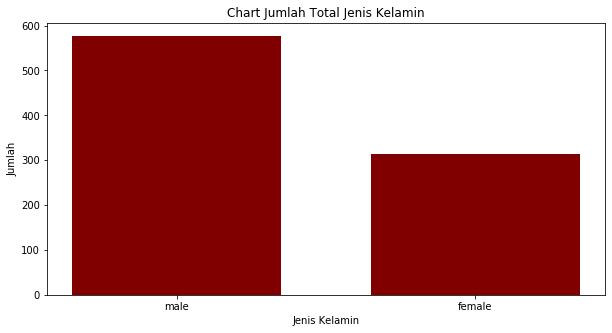

In [12]:
# menyiapkan data untuk simple barplot
count_sex = train['Sex'].value_counts()
index_sex = count_sex.index
value_sex = count_sex.values


# pembuatan simple barplot 
fig = plt.figure(figsize = (10, 5) )
plt.bar(index_sex, value_sex , color = "maroon",  width = 0.7) 


plt.title("Chart Jumlah Total Jenis Kelamin") # menambahkan judul
plt.xlabel("Jenis Kelamin")  # menambahkan judul di sumbu-x
plt.ylabel("Jumlah") # menambahkan judul di sumbu-y



plt.show()

In [13]:
# membuat function untuk simple barchart

def bar_chart(column):
  count = train[column].value_counts()

  index = count.index 
  values = count.values 

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.show()


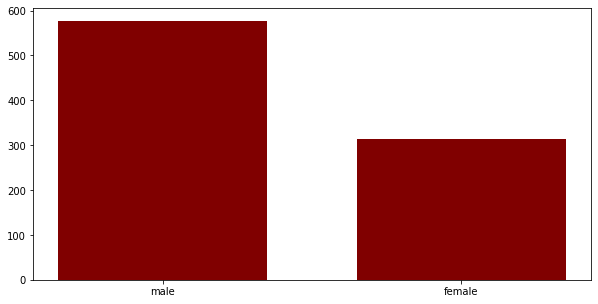

In [14]:
bar_chart("Sex")

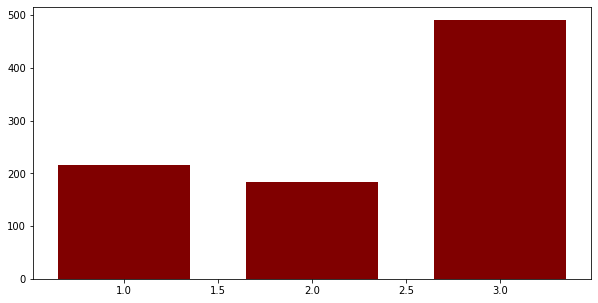

In [15]:
bar_chart("Pclass")

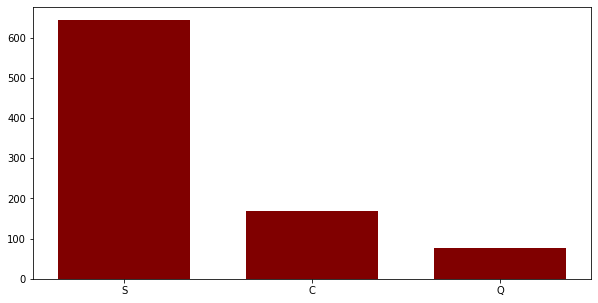

In [16]:
bar_chart("Embarked")

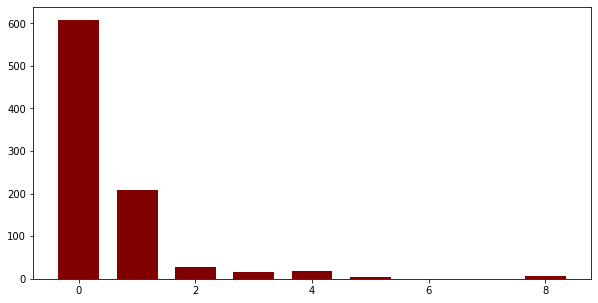

In [17]:
bar_chart("SibSp")

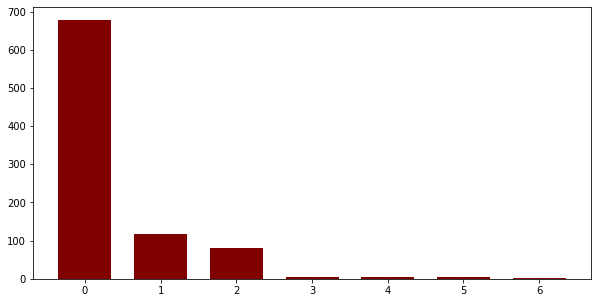

In [18]:
bar_chart("Parch")

### Grouped Barchart / Clustered Barchart

In [19]:
survived_sex = train.groupby(['Survived', "Sex"]).count()['PassengerId'].reset_index()
survived_sex

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [20]:
# membuat fungsi untuk grouped barchart/clutered barchart 
def grouped_barchart(column): 
  survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()

  g = sns.catplot(
      data = survived, kind = "bar", 
      x = "Survived", y = "PassengerId", hue = column, 
      palette = "dark" , height = 6
  )

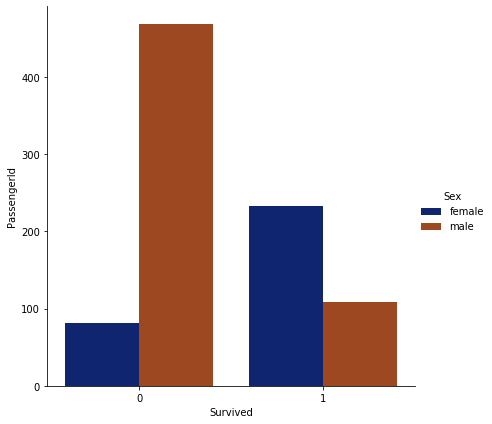

In [21]:
grouped_barchart("Sex")

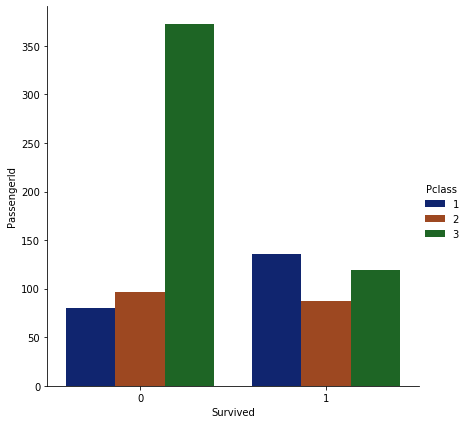

In [22]:
grouped_barchart("Pclass")

### Histogram

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


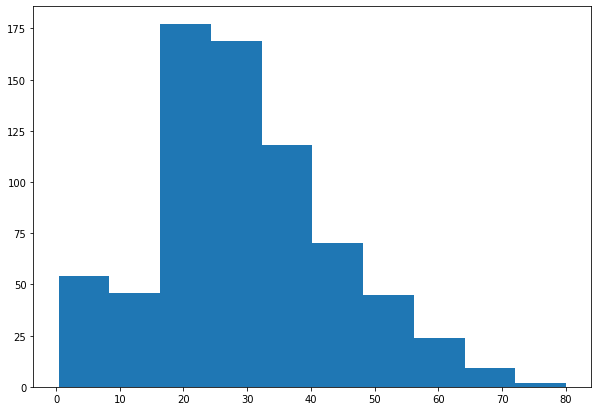

In [23]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Age)
plt.show()

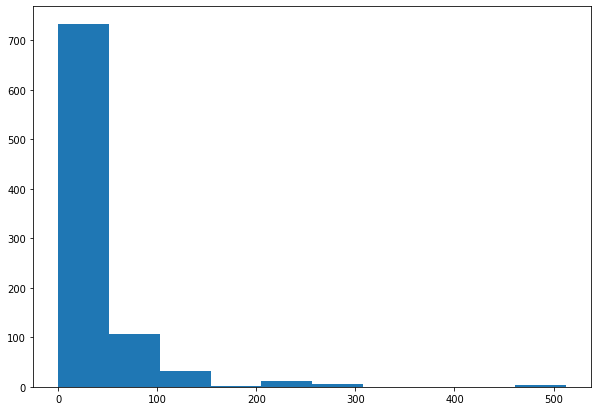

In [24]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Fare)

plt.show()

### KDE Plot (Kernel Density Estimate)

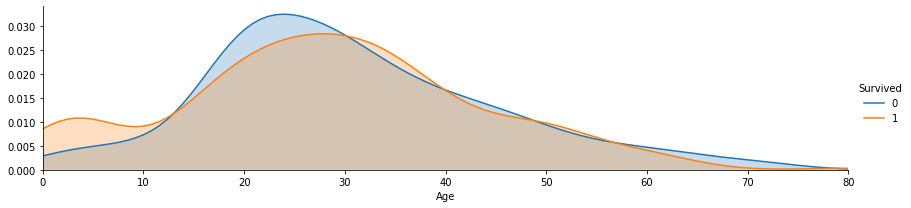

In [25]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

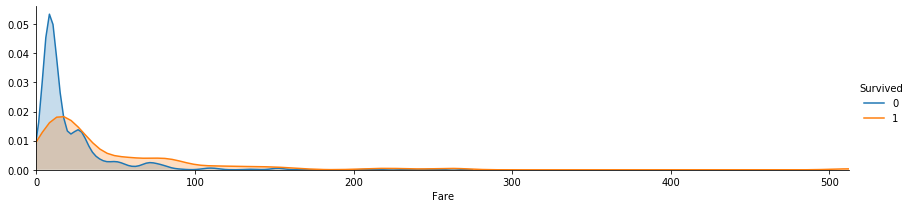

In [26]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

# Preprocessing Data

## Mengisi Missing Value

In [27]:
train.shape , test.shape

((891, 12), (418, 11))

In [28]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Mengisi Missing Value Categorical data

### Missing Value Data Embarked

In [30]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [31]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
mode_embarked = train['Embarked'].mode()[0]
mode_embarked

'S'

In [33]:
train['Embarked'] = train['Embarked'].fillna(mode_embarked)

In [34]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [35]:
train[train['Embarked'].index == 61]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S


### Missing Value Data Age

In [36]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [37]:
train['Age'] = train["Age"].fillna(mean_age)

In [38]:
mean_age_test = test['Age'].mean()
mean_age_test

30.272590361445783

In [39]:
test['Age'] = test["Age"].fillna(mean_age_test)

### Missing Value Data Fare

In [40]:
mean_fare_test = test['Fare'].mean()

test['Fare'] = test['Fare'].fillna(mean_fare_test)

### Drop Data Cabin Karena terlalu banyak Missing Value

In [41]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1 )

In [42]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [43]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Convert Data to Numberic 

### Convert Data Sex

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [45]:
sex_mapping = {"male" : 0, "female" : 1}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


### Convert Embarked

In [47]:
embarked = train[['Embarked']] 

dummies = pd.get_dummies(embarked)

In [48]:
dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [50]:
train = pd.merge(train.reset_index(),  dummies.reset_index())
train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,1


In [51]:
train = train.drop(["index",'Embarked'], axis =1 )

In [52]:
embarked_test = test[['Embarked']] 

dummies_test = pd.get_dummies(embarked_test)

In [53]:
test = pd.merge(test.reset_index(),  dummies_test.reset_index())
test = test.drop(['index', 'Embarked'], axis = 1 )
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,1


### Extract Title from Name and Convert Title 


In [54]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,Mr


In [56]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

train['Title'] = train['Title'].map(title_mapping)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0


In [58]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
test['Title'] = test['Title'].map(title_mapping)

## Selected Column 

In [59]:
train.shape, test.shape

((891, 14), (418, 13))

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0


In [61]:
train = train.drop(["PassengerId",'Name', "Ticket"], axis = 1)
test = test.drop(["PassengerId",'Name' , "Ticket"], axis = 1 )

# Modelling

In [62]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [63]:
train.shape, test.shape

((891, 11), (418, 10))

In [64]:

train_data = train.drop("Survived",axis = 1 )
target = train['Survived']

In [65]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.71111111 0.82022472 0.7752809  0.82022472 0.80898876 0.78651685
 0.7752809  0.76404494 0.7752809  0.7752809 ]


In [66]:
score.mean()

0.781223470661673

## Prediction

In [67]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,0,34.5,0,0,7.8292,0,1,0,0
1,3,1,47.0,1,0,7.0000,0,0,1,2
2,2,0,62.0,0,0,9.6875,0,1,0,0
3,3,0,27.0,0,0,8.6625,0,0,1,0
4,3,1,22.0,1,1,12.2875,0,0,1,2


In [69]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

DecisionTreeClassifier()

In [71]:
prediction = clf.predict(test)

In [78]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": prediction
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [77]:
submission.to_csv("coba_submit_lagi2.csv", index = False)